In [677]:
from scipy import signal
from numpy import pi, sqrt, linspace,exp,allclose,shape,concatenate,ones,zeros,abs
from scipy.special import fresnel
from scipy.signal import convolve
from scipy.fftpack import fft, ifft,fftshift,ifftshift

In [345]:
# Import graphing routines

import matplotlib.pyplot as plt
#make pretty comments
from IPython.display import Latex 
#in case we want interactivity
#from IPython.html.widgets import interactive 
from ipywidgets import interactive
#Make plots show up in notebook
%pylab inline --no-import-all 

Populating the interactive namespace from numpy and matplotlib


http://www.photonics.intec.ugent.be/download/ocs130.pdf


array([-50.        , -49.90224829, -49.80449658, ...,  49.80449658,
        49.90224829,  50.        ])

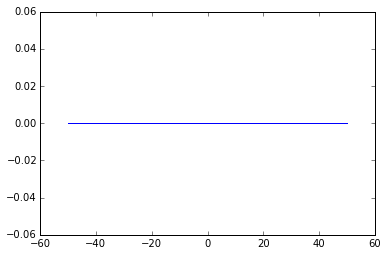

In [528]:

l=5e-6
wavelength=.532
k = 2*pi/wavelength
z=100
x  = np.linspace(-50, 50, num = 1024)
sig = np.zeros(x.size, dtype='complex128') # Ensure the field is complex

sig[np.logical_and(x > -l / 2, x <= l / 2)] =1.+0j
fx=-x/(wavelength*z)


H=exp(-1j*k*z)*(exp(-1j*pi*wavelength*z*fx**2))
Esig=ifft(fft(sig)*H)
plt.plot(x,sig)
x

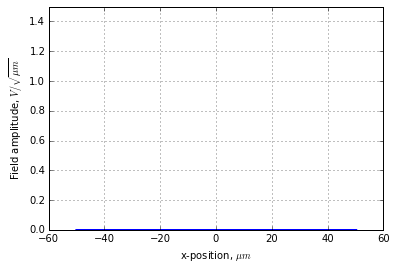

In [521]:
plt.plot(x, np.abs(sig), '.')
plt.xlabel(r'x-position, $\mu m$')
plt.ylabel(r'Field amplitude, $V / \sqrt{\mu m}$')
plt.ylim((0, 1.5))
plt.grid(True)


In [380]:
sig

In [454]:
x=np.linspace(-1,1,len(sig))
z=1
wavelength=1.
fx=-x/(wavelength*z)
H=np.exp(-1j*k*z)*np.exp(-1j*np.pi*z*wavelength*z*fx**2)

In [455]:
sigfft=fft(sig)
diff=ifft(sigfft*H)


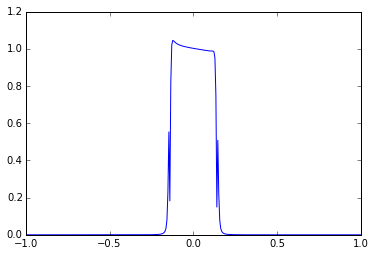

In [456]:
plt.plot(x,diff*diff.conj())

In [407]:
1j*-1j

(1+0j)

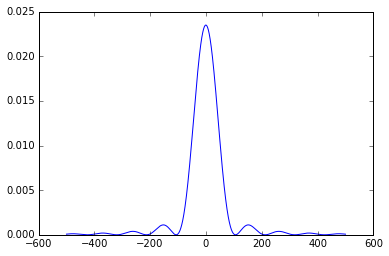

In [784]:
amplitude    = 1     # Volt / sqrt(micron)
slitWidth    = 5# microns
wavelength   = 0.532 # microns
z = 1000 # microns (= 10 mm)
x     = np.linspace(-500, 500, num = 2048)
k=2*pi/wavelength
u1=sqrt(k/(pi*z))*(-slitWidth/2-x)
u2=sqrt(k/(pi*z))*(slitWidth/2-x)
sfu1,cfu1=fresnel(u1)
sfu2,cfu2=fresnel(u2)
Intensity=1/4.*((cfu2-cfu1)**2+(sfu2-sfu1)**2)
plt.plot(x,Intensity)

dx = x[1] - x[0] # Spatial sampling period, microns
fS = 1 / dx      # Spatial sampling frequency, units are inverse microns
f  = (fS / x.size) * np.arange(0, x.size, step = 1) # inverse microns
kernel=-exp(-1j*k*z)/(1j*wavelength*z)*exp(-(1j*k)/(2*z)*(x**2))
field = np.zeros(x.size, dtype='complex128') # Ensure the field is complex
fx=-x/(wavelength*z)
field[np.logical_and(x > -slitWidth / 2, x <= slitWidth / 2)] = amplitude + 0j
screen=ifftshift(ifft(fftshift(fft(field))*fftshift(fft(kernel))))*dx
#plt.plot(x,abs(screen))


In [713]:
for i in z

SyntaxError: invalid syntax (<ipython-input-713-7d9a888c44e8>, line 1)

In [419]:
N=100
N//2

50

In [747]:
amplitude    = 1     # Volt / sqrt(micron)
slitWidth    =5     # microns
wavelength   = 0.532 # microns
z = 100 # microns (= 10 mm)
x     = np.linspace(-50, 50, num = 2048)
field = np.zeros(x.size, dtype='complex128') # Ensure the field is complex
fx=-x/(wavelength*z)
field[np.logical_and(x > -slitWidth / 2, x <= slitWidth / 2)] = amplitude + 0j
H=exp(-1j*k*z)*exp(1j*np.pi*z*wavelength*z*fx**2)

dx = x[1] - x[0] # Spatial sampling period, microns
fS = 1 / dx      # Spatial sampling frequency, units are inverse microns
f  = (fS / x.size) * np.arange(0, x.size, step = 1) # inverse microns

diffractedField = dx * fft(field) # The field must be rescaled by dx to get the correct units



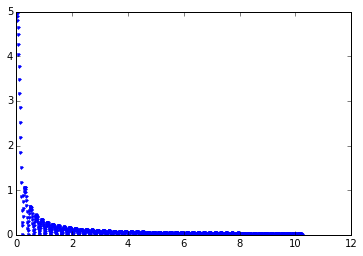

In [748]:
sigfft=(fft(field))

plt.plot(f[f <= fS / 2], np.abs(diffractedField[f <= fS / 2]), '.', linewidth = 2)

In [749]:
kernel=-exp(-1j*k*z)/(1j*wavelength*z)*exp(-(1j*k)/(2*z)*(x**2))
x

array([-50.        , -49.95114802, -49.90229604, ...,  49.90229604,
        49.95114802,  50.        ])

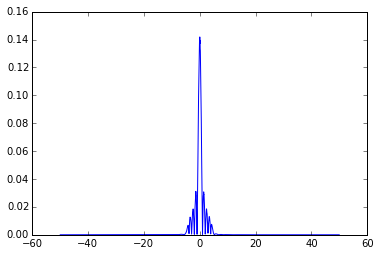

In [750]:
convolvescreen=convolve(field,kernel,mode='same')
plt.plot(x,abs(ifftshift(ifft(convolvescreen))))

In [751]:
screen=ifftshift(ifft(fftshift(fft(field))*fftshift(fft(kernel))))


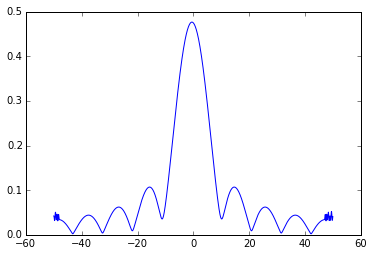

In [752]:
plt.plot(x,abs(screen)/4)

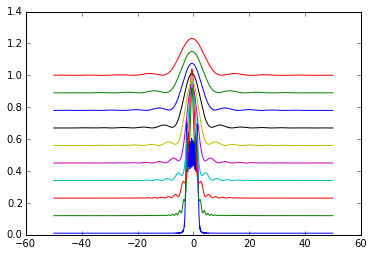

In [779]:
amplitude    = 1     # Volt / sqrt(micron)
slitWidth    = 5# microns
wavelength   = 0.532 # microns
z = linspace(1,100,10) # microns (= 10 mm)
x     = np.linspace(-50, 50, num = 2048)
k=2*pi/wavelength
for i in z:
    u1=sqrt(k/(pi*i))*(-slitWidth/2-x)
    u2=sqrt(k/(pi*i))*(slitWidth/2-x)
    sfu1,cfu1=fresnel(u1)
    sfu2,cfu2=fresnel(u2)
    Intensity=1/4.*((cfu2-cfu1)**2+(sfu2-sfu1)**2)
    plt.plot(x,Intensity+(i/100))

In [780]:
fresnel(4)

(0.42051575424692844, 0.49842603303817756)